<a href="https://colab.research.google.com/github/ameliampas/Pemograman_Python/blob/main/Python_14_1101194085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#nilai
Tt = 80          #Tinggi Tower (meter)
Tu = 1.5         #Tinggi User (meter)
dmin = 300       #jarak (meter)
dmax = 1000      #jarak (meter)
N= 200           #jumlah user
Dt = 30          #Daya transmitter (Watt)
Gt = 10         #Gain antena pengirim (dB)
Gr = 2          #Gain antena penerima (dB)
bw = 5           #Bandwidth sistem (MHz)
d=np.random.randint(dmin,dmax,N)
d_sort=d[np.argsort(d)]

In [3]:
#fungsi pathloss cost 231 (dB)
def cost(d,f,type,Ht,Hr):
  if f in range(1501,2001):
    C1=46.3
    C2=33.9
  elif f in range(150,1501):
    C1=69.55
    C2=26.16

  if type=='urban':
    Cm=0
  elif type=='suburban' :
    Cm=-2*((np.log10((f/28)**2))-(5.4))
  elif type=='open':
    Cm=-4.78*(np.log10(f))+(18.33*(np.log10(f)))-40.94
  else :
    Cm='type salah'

  a=(((1.1*np.log10(f))-(0.7))*Hr)-((1.56*np.log10(f))-(1.8))
  lp=C1+(C2*np.log10(f))-(13.83*np.log(Ht))-a+((44.9-6.55*np.log10(Ht))*np.log10(d))-Cm
  return lp

In [4]:
#perhitungan variasi lokasi
LpUrban=cost(d,1800,'urban',Tt,Tu)
LpSuburban=cost(d,1800,'suburban',Tt,Tu)
LpOpen=cost(d,1800,'open',Tt,Tu)

#perhitungan variasi frekuensi
Lp700=cost(d,700,'urban',Tt,Tu)
Lp900=cost(d,900,'urban',Tt,Tu)
Lp1800=cost(d,1800,'urban',Tt,Tu)

In [5]:
#fungsi perhitungan daya terima (milliwatt)
Wtm = Dt*1000  #watt to milliwatt
Ptx = 10*np.log10(Wtm)  #milliwatt to dBm

def prx (Ptx,PL,Gtx,Grx):
  dt = Ptx+Gtx+Grx-PL
  dtm = 10**(dt/10) #dBm to mWatt
  return dtm

In [6]:
#perhitungan Prx variasi lokasi
Prx_Urban     =prx(Ptx,LpUrban,Gt,Gr)
Prx_Suburban  =prx(Ptx,LpSuburban,Gt,Gr)
Prx_Open      =prx(Ptx,LpOpen,Gt,Gr)

Urban_prxsort     =Prx_Urban[np.argsort(d)]
Suburban_prxsort  =Prx_Suburban[np.argsort(d)]
Open_prxsort      =Prx_Open[np.argsort(d)]

#perhitungan Prx variasi frekuensi
Prx700   =prx(Ptx,Lp700,Gt,Gr)
Prx900   =prx(Ptx,Lp900,Gt,Gr)
Prx1800  =prx(Ptx,Lp1800,Gt,Gr)

tuj_prxsort  =Prx700[np.argsort(d)]
sem_prxsort  =Prx900[np.argsort(d)]
del_prxsort  =Prx1800[np.argsort(d)]

In [7]:
#fungsi perhitungan signal to noise ratio (numerik)
def snr (prx,bw):
  bwh= bw*1000000 #megahz to hz
  no= (-174)+10*np.log10(bwh) #Noise dalam logaritmik
  ltn= 10**(no/10)
  snrx = prx/ltn
  return snrx

In [8]:
#perhitungan snr variasi lokasi
snr_u       =snr(Prx_Urban,bw)
snr_s       =snr(Prx_Suburban,bw)
snr_o       =snr(Prx_Open,bw)

u_snrsort   =snr_u[np.argsort(d)]
s_snrsort   =snr_s[np.argsort(d)]
o_snrsort   =snr_o[np.argsort(d)]

#perhitungan snr variasi frekuensi
snr700   =snr(Prx700,bw)
snr900   =snr(Prx900,bw)
snr1800  =snr(Prx1800,bw)

tuj_snrsort  =snr700[np.argsort(d)]
sem_snrsort  =snr900[np.argsort(d)]
del_snrsort  =snr1800[np.argsort(d)]

In [9]:
#Fungsi perhitungan kapasitas seluler (bps)
def kap(snr,bw):
  bwh= bw*1000000 #megahz to hz
  kps= bwh*(2*np.log(1+snr))
  return kps

In [10]:
#perhitungan kapasitas variasi lokasi
kps_u       =kap(snr_u,bw)
kps_s       =kap(snr_s,bw)
kps_o       =kap(snr_o,bw)

u_kpssort   =kps_u[np.argsort(d)]
s_kpssort   =kps_s[np.argsort(d)]
o_kpssort   =kps_o[np.argsort(d)]

#perhitungan kapasitas variasi frekuensi
kps700   =kap(Prx700,bw)
kps900   =kap(Prx900,bw)
kps1800  =kap(Prx1800,bw)

tuj_kpssort  =kps700[np.argsort(d)]
sem_kpssort  =kps900[np.argsort(d)]
del_kpssort  =kps1800[np.argsort(d)]

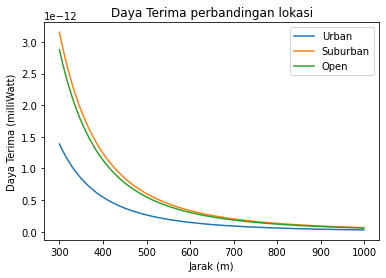

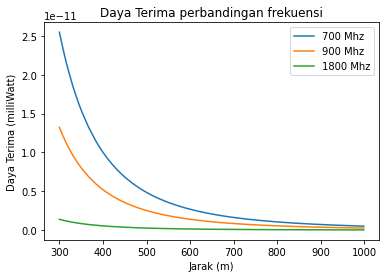

In [11]:
#GRAFIK DAYA TERIMA
#Grafik 1 perhitungan Prx variasi lokasi
plt.figure()
plt.plot(d_sort,Urban_prxsort,label='Urban')
plt.plot(d_sort,Suburban_prxsort,label='Suburban')
plt.plot(d_sort,Open_prxsort,label='Open')
plt.legend()
plt.title('Daya Terima perbandingan lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (milliWatt)')
plt.show()

#Grafik 2 perhitungan Prx variasi frekuensi
plt.figure()
plt.plot(d_sort,tuj_prxsort,label='700 Mhz')
plt.plot(d_sort,sem_prxsort,label='900 Mhz')
plt.plot(d_sort,del_prxsort,label='1800 Mhz')
plt.legend()
plt.title('Daya Terima perbandingan frekuensi')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (milliWatt)')
plt.show()

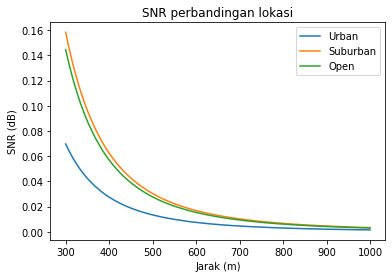

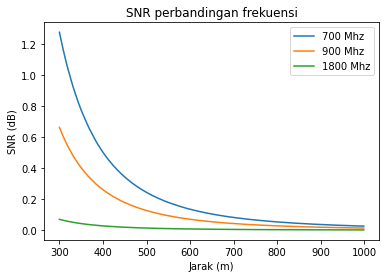

In [12]:
#GRAFIK SNR
#Grafik 1 perhitungan snr variasi lokasi
plt.figure()
plt.plot(d_sort,u_snrsort,label='Urban')
plt.plot(d_sort,s_snrsort,label='Suburban')
plt.plot(d_sort,o_snrsort,label='Open')
plt.legend()
plt.title('SNR perbandingan lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

#Grafik 2 perhitungan snr variasi frekuensi
plt.figure()
plt.plot(d_sort,tuj_snrsort,label='700 Mhz')
plt.plot(d_sort,sem_snrsort,label='900 Mhz')
plt.plot(d_sort,del_snrsort,label='1800 Mhz')
plt.legend()
plt.title('SNR perbandingan frekuensi')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

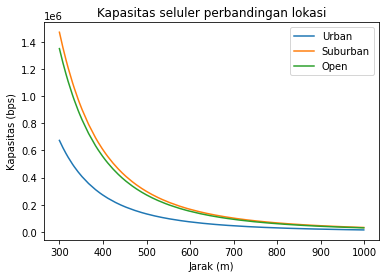

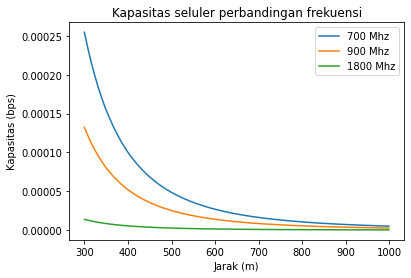

In [13]:
#GRAFIK SNR
#Grafik 1 perhitungan kapasitas variasi lokasi
plt.figure()
plt.plot(d_sort,u_kpssort,label='Urban')
plt.plot(d_sort,s_kpssort,label='Suburban')
plt.plot(d_sort,o_kpssort,label='Open')
plt.legend()
plt.title('Kapasitas seluler perbandingan lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

#Grafik 2 perhitungan kapasitas variasi frekuensi
plt.figure()
plt.plot(d_sort,tuj_kpssort,label='700 Mhz')
plt.plot(d_sort,sem_kpssort,label='900 Mhz')
plt.plot(d_sort,del_kpssort,label='1800 Mhz')
plt.legend()
plt.title('Kapasitas seluler perbandingan frekuensi')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()